<a href="https://colab.research.google.com/github/Ahnjihye/KOFAC-AI-book/blob/main/K_means_%EB%8D%94_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0_(%EB%82%A0%EC%94%A8%EB%A1%9C_%EC%A7%80%EC%97%AD%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기

데이터 불러오는 방법 2가지 중 택1 하여 진행

1. 깃허브에서 바로 데이터 복사하기

```
import pandas as pd

! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git

data = pd.read_csv("KOFAC-AI-book/weather_by_region.csv") #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```

2. PC에 저장된 파일을 업로드하기

```
import pandas as pd
from google.colab import files
uploaded = files.upload()                             #파일 업로드

data = pd.read_csv("weather_by_region.csv") #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```





## 1. 데이터 불러오기

In [1]:
import pandas as pd
 
! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git
 
data = pd.read_csv("KOFAC-AI-book/weather_by_region.csv") #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기

Cloning into 'KOFAC-AI-book'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


,지역이름,평균기온,최고기온,최저기온,평균습도,평균풍속,연강수량
0,서울,12.5,17.0,8.6,64.4,2.3,1450.5
1,수원,12.0,17.2,7.5,69.6,1.7,1312.3
2,이천,11.6,17.8,6.2,66.7,1.3,1370.8
3,양평,11.5,17.7,6.3,70.5,1.2,1438.2
4,인천,12.1,16.4,8.7,68.6,2.9,1234.4
5,강화,11.1,16.2,6.3,70.2,1.7,1346.7
6,동두천,11.2,17.5,6.0,66.5,1.6,1502.9
7,백령도,11.2,14.5,8.6,69.9,4.9,825.6
8,강릉,13.1,17.5,9.2,61.4,2.6,1464.5
9,춘천,11.1,17.2,5.9,71.0,1.3,1347.3


## 2. 데이터를 산점도로 나타내기

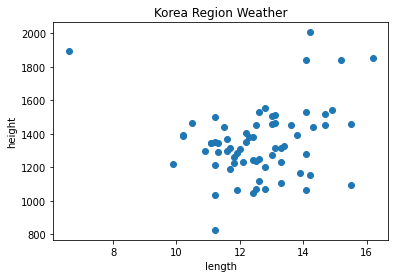

In [4]:
import matplotlib.pyplot as plt       # 그래프 시각화 라이브러리

plt.scatter(data['평균기온'],data['연강수량']) 
plt.xlabel('length') 		      # x축 이름 설정하기
plt.ylabel('height')              # y축 이름 설정하기
plt.title('Korea Region Weather') # 그래프 제목 설정하기
plt.show()                        # 그래프 출력하기

## 3. K-means 모델 생성하고 학습시키기

In [8]:
from sklearn.cluster import KMeans   # k-means 기능 포함시키기 

# K-means 모델 생성
model = KMeans(n_clusters = 4)       # 나눌 그룹 개수(k) = 4

# 전체데이터 중 '평균기온' 속성과 '연강수량'속성만 선택하여 K-means 학습 
labels = model.fit_predict(data[['평균기온','연강수량']])

# K-means 학습 결과가 저장된 변수 labels 확인
print(labels)    

# 그룹 세 개의 각 중심점 x좌표, y좌표를 center에 저장하고 확인
center = pd.DataFrame(model.cluster_centers_, columns=['평균기온','연강수량']) 
center

[1 3 1 1 3 3 1 0 1 3 3 1 1 2 1 3 3 3 3 3 3 3 3 1 3 1 0 1 1 0 1 1 3 1 3 3 3
 1 3 1 3 1 3 1 1 1 3 3 1 3 2 2 0 0 0 0 3 3 3 0 0 0 0 1 1 0 2 2]


,평균기온,연강수량
0,12.966667,1068.058333
1,12.825000,1457.895833
2,13.260000,1887.280000
3,12.048148,1279.655556


## 4. K-means 분류 결과 그래프로 확인하기

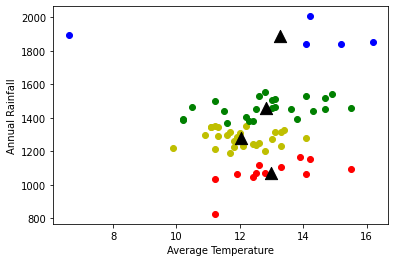

In [9]:
import matplotlib.pyplot as plt     # 그래프 출력을 위한 라이브러리

# 1. 지역을 그룹별로 색상을 구분해 산점도로 나타내기
# 그룹0은 빨강, 그룹1은 초록, 그룹2는 파랑, 그룹3은 노랑색 점으로 표시
for i in range(len(labels)):         
    if labels[i] == 0:
        plt.scatter(data["평균기온"][i],data["연강수량"][i], c='r')
    elif labels[i] == 1:
        plt.scatter(data["평균기온"][i],data["연강수량"][i], c='g')
    elif labels[i] == 2:
        plt.scatter(data["평균기온"][i],data["연강수량"][i], c='b')
    elif labels[i] == 3:
        plt.scatter(data["평균기온"][i],data["연강수량"][i], c='y')

# 2. 각 그룹의 중심점을 삼각형으로 산점도 위에 나타내기
plt.scatter(center['평균기온'], center['연강수량'], marker='^', c = 'black', s=150)
plt.xlabel("Average Temperature")   # x축 이름 설정하기
plt.ylabel("Annual Rainfall")       # y축 이름 설정하기
plt.show()                          # 그래프 출력하기

## 5. 지역별 그룹 확인해보기

In [11]:
# 배정 그룹 결과(label)을 하나의 데이터프레임으로 만들어 변수 cluster에 저장
cluster = pd.DataFrame(labels, columns =['배정된 그룹'])    

# 원 데이터셋과 배정 그룹 결과를 합쳐 변수 data_cluster에 저장
data_cluster = pd.concat([cluster,  data], axis=1)  

pd.set_option('display.max_row', 100)                   # 데이터셋 전부 출력하도록 설정
data_cluster                                            # 데이터셋 출력하기

,배정된 그룹,지역이름,평균기온,최고기온,최저기온,평균습도,평균풍속,연강수량
0,1,서울,12.5,17.0,8.6,64.4,2.3,1450.5
1,3,수원,12.0,17.2,7.5,69.6,1.7,1312.3
2,1,이천,11.6,17.8,6.2,66.7,1.3,1370.8
3,1,양평,11.5,17.7,6.3,70.5,1.2,1438.2
4,3,인천,12.1,16.4,8.7,68.6,2.9,1234.4
5,3,강화,11.1,16.2,6.3,70.2,1.7,1346.7
6,1,동두천,11.2,17.5,6.0,66.5,1.6,1502.9
7,0,백령도,11.2,14.5,8.6,69.9,4.9,825.6
8,1,강릉,13.1,17.5,9.2,61.4,2.6,1464.5
9,3,춘천,11.1,17.2,5.9,71.0,1.3,1347.3
